### In this notebook I tried building models on the data that is obtained after feature engineering. 

The two problems that are addressed are: 
* predict whether a product will be reordered or not
* Predict which department a product will belong to

The features which would be used for -

- predicting whether a product will be reordered or not : 

Order_id, Order_number, Average_days_between_orders, Nb_orders(Number of orders), Average_basket, Total items, Aisle, Department, Product, User_id, Order_hour_of_day, Order_dow(day of week), Days_since_prior_order, Days_since_ratio

- Predicting which department a product will belong to : 

Order_id, Order_number, Average_days_between_orders, Nb_orders(Number of orders), Average_basket, Orders, Reorders, Reordered rate, Total items, User_id, Order_hour_of_day, Order_dow(day of week), Days_since_prior_order, Days_since_ratio

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score

In [8]:
#Spliting into training and testing
df = pd.read_pickle('./feature_dataset.pkl')
from sklearn.model_selection import train_test_split

In [9]:
df.head()

,order_id,reordered,order_number,avg_days_btwn_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,1.0,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.0,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,0.0,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,1.0,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [10]:
y = df['reordered']
del df['reordered']

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.30, random_state=5)

In [12]:
Xtrain.shape
Xtest.shape
ytrain.shape
ytest.shape

(415386,)

In [ ]:
ytrain=ytrain.ravel()
ytest=ytest.ravel()

------

# Problem 1

## Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score

In [15]:
#buidling logistic regression
clf=(LogisticRegression(C=0.02))

In [16]:
#fitting the model
clf.fit(Xtrain, ytrain)

LogisticRegression(C=0.02)

In [17]:
train=clf.predict(Xtrain)

In [18]:
print(recall_score(train,ytrain))

0.6184014545816833


In [19]:
print(accuracy_score(train,ytrain))

0.5976284291360883


In [20]:
print(precision_score(train,ytrain))

0.8559396972104961


In [21]:
print(roc_auc_score(train,ytrain))

0.5578488557231518


In [22]:
#On test data
test=clf.predict(Xtest)

In [23]:
test

array([1., 1., 1., ..., 1., 0., 1.])

In [24]:
#accuracy score of Logistic Regression Model
print(accuracy_score(clf.predict(Xtest), ytest))

0.59711930589861


In [25]:
print(precision_score(clf.predict(Xtest), ytest))

0.8565414078050546


In [26]:
print(recall_score(clf.predict(Xtest), ytest))

0.6179834282995439


In [27]:
print(roc_auc_score(clf.predict(Xtest), ytest))

0.5566933350374415


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Building Random Forest model
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, 
                               oob_score=True)

In [30]:
#fitting the model
clfrf.fit(Xtrain, ytrain)

/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=11, max_features='log2',
                       min_samples_split=1000, n_estimators=24, oob_score=True)

In [31]:
train=clf.predict(Xtrain)

In [32]:
print(accuracy_score(train,ytrain))

0.5976284291360883


In [33]:
print(precision_score(train, ytrain))

0.8559396972104961


In [34]:
print(recall_score(train,ytrain))

0.6184014545816833


In [35]:
print(roc_auc_score(train,ytrain))

0.5578488557231518


In [36]:
#testting the model
testrf=clfrf.predict(Xtest)

In [37]:
testrf

array([1., 0., 1., ..., 1., 0., 1.])

In [38]:
#accuracy score for the random forest model
accuracy_score(testrf, ytest)

0.6640835271289837

In [39]:
#Recall score for the random forest model
recall_score(testrf, ytest)

0.6816176030137041

In [40]:
#Precision score for the random forest model
precision_score(testrf, ytest)

0.8236202424754208

In [41]:
#AUC score for the random forest model
roc_auc_score(testrf, ytest)

0.6499208371577241

<AxesSubplot:>

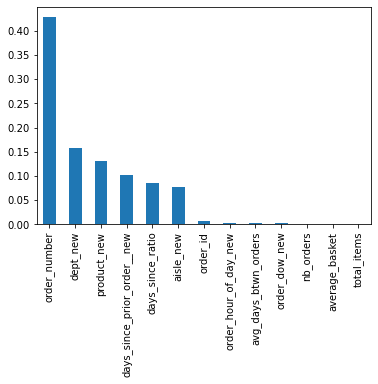

In [43]:
feature_imp_reorder = pd.Series(clfrf.feature_importances_,index= df.columns)
feature_imp_reorder.sort_values(ascending=False).plot(kind='bar')

Looking at the feature importances for predicting whether a product will be reoredered or not, the most important features we observed are order_number, department, product, days since prior order and aisle

## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
#AdaBoost Classifier buiding
clfa = AdaBoostClassifier( n_estimators=24,random_state=True)

In [46]:
#fitting
clfa.fit(Xtrain, ytrain)

AdaBoostClassifier(n_estimators=24, random_state=True)

In [47]:
train = clfa.predict(Xtrain)

In [48]:
#Metrics for the random forest model
print(accuracy_score(train,ytrain))
print(precision_score(train, ytrain))
print(recall_score(train,ytrain))
print(roc_auc_score(testrf, ytest))


0.655712621655725
0.8002013310603149
0.6806752383759206
0.6499208371577241


In [49]:
#testing
testada = clfa.predict(Xtest)

In [50]:
#Metrics for AdaBoost Classifier

print(accuracy_score(testada, ytest))
print(precision_score(testada, ytest))
print(recall_score(testada, ytest))
print(roc_auc_score(testada, ytest))

0.6565339226647022
0.8013028530068158
0.6812019280073839
0.6394996746893727


## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
clfg= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [53]:
#fitting
clfg.fit(Xtrain, ytrain)

GradientBoostingClassifier(max_depth=11, max_features='log2',
                           min_samples_split=1000, n_estimators=24)

In [54]:
traing = clfg.predict(Xtrain)

In [55]:
#Metrics for Gradient Boosting Model on training Data

print(accuracy_score(traing,ytrain))
print(precision_score(traing,ytrain))
print(recall_score(traing,ytrain))
print(roc_auc_score(traing,ytrain))

0.6757676962457866
0.8280774090347314
0.691305580378664
0.663855652602479


In [56]:
testg = clfg.predict(Xtest)

In [57]:
#Metrics for Gradient Boosting Model on Test Data

print(accuracy_score(testg, ytest))
print(precision_score(testg, ytest))
print(recall_score(testg, ytest))
print(roc_auc_score(testg, ytest))

0.670650912645106
0.8245209803566761
0.6875800599569437
0.6575723329177408


-----

# Problem for predicting department variable

In [71]:
df_new = pd.read_pickle('./dataset.pkl')

In [72]:
df_new.head()

,order_id,reordered,user_id,order_number,orders,reorders,reorder_rate,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,order_hour_of_day_new,order_dow_new,days_since_prior_order__new,dept_new
0,1,1.0,112108,4,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0
1,1,1.0,112108,4,76.0,49.0,0.644737,19.000000,10.0,11.0,1.100000,0.473684,0.0,0.0,0.0,0.0
2,1,0.0,112108,4,4.0,1.0,0.250000,16.285715,14.0,31.0,2.214286,0.552632,0.0,0.0,0.0,1.0
3,1,0.0,112108,4,6.0,6.0,1.000000,12.000000,12.0,0.0,0.000000,0.750000,0.0,0.0,0.0,1.0
4,1,1.0,112108,4,22.0,14.0,0.636364,17.000000,5.0,0.0,0.000000,0.529412,0.0,0.0,0.0,2.0


In [73]:
ynew = df_new['dept_new']
del df_new['dept_new']

In [74]:
#Splitting the data into train and test
Xtrainnew, Xtestnew, ytrainnew, ytestnew = train_test_split(df_new, ynew, test_size=0.30, random_state=5)

## Random Forest Classifier


In [75]:
#Random Forest Classifier

clfrfnew = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, oob_score=True)

In [76]:
#Building model
clfrfnew.fit(Xtrainnew, ytrainnew)

/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kesamsetty/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=11, max_features='log2',
                       min_samples_split=1000, n_estimators=24, oob_score=True)

In [77]:
trainnrf = clfrfnew.predict_proba(Xtrainnew)

In [78]:
#predictions and probabiliti
testnrf =clfrfnew.predict_proba(Xtestnew)

<AxesSubplot:>

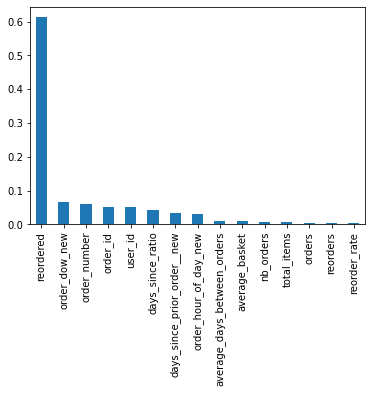

In [79]:
feature_imp_dept = pd.Series(clfrfnew.feature_importances_,index= df_new.columns)
feature_imp_dept.sort_values(ascending=False).plot(kind='bar')

The most important features while predicting the department are: Reordered, day of week, order number, user_id and order_id.

In [80]:
# Log loss for the Random Forest model
from sklearn.metrics import log_loss
log_loss(ytestnew,testnrf)


2.3429320833738223

In [81]:
log_loss(ytrainnew,trainnrf)

2.3338350429785755

## Gradient Boosting Classifier


In [82]:
#Gradient Boosting Classifier
clfgb= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [83]:
#fitting
clfgb.fit(Xtrainnew,ytrainnew)

GradientBoostingClassifier(max_depth=11, max_features='log2',
                           min_samples_split=1000, n_estimators=24)

In [84]:
predgbterainn=clfgb.predict_proba(Xtrainnew)

In [85]:
#predictions and probabilties
predgbnewp =clfgb.predict_proba(Xtestnew)

In [86]:
#Log loss score for Gradient Boosting Classifier
log_loss( ytestnew,predgbnewp)


2.3425842964945995

In [87]:
log_loss(ytrainnew,predgbterainn)

2.2873423800021246

In [88]:
clfada = AdaBoostClassifier( n_estimators=24,random_state=True)

In [89]:
predadatrain = clfada.fit(Xtrainnew, ytrainnew)

In [90]:
predaptr = clfada.predict_proba(Xtrainnew)

In [91]:
#predictions and probabilities
predadap = clfada.predict_proba(Xtestnew)

In [92]:
log_loss(ytestnew,predadap)

2.979625315097

In [93]:
log_loss( ytrainnew,predaptr)

2.9795467406613367

# Observations:

- The best model for predicting whether a product will be reorodered or not is the Gradient Boosting Classifier with 0.67 accuracy. 
- Whereas while predicting the category of the department, Random Forest Classifier is the best model with a log loss score of 2.342.